In [105]:
import numpy as np
from preprocess import *
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from scipy.cluster.hierarchy import dendrogram, linkage


stop_list = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()

folder_path = 'preprocessed2'  # Replace with path to your folder
sentences = []

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        # Read the text file and store the text in the sentences list
        with open(os.path.join(folder_path, filename), 'r') as f:
            document = f.readlines()
            for sentence in document:
                sentences.append(sentence)

# Create a bag-of-words matrix
vectorizer = CountVectorizer()
word_matrix = vectorizer.fit_transform(sentences).toarray()

# Perform agglomerative clustering
Z = linkage(word_matrix, 'ward')

# Plot the dendrogram
plt.figure(figsize=(20, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sentences')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=5., labels=sentences)
plt.show()

KeyboardInterrupt: 

['I want to increase my Twitter followers. At least 10,000. #ChatGPT https://t.co/78BaGH28Vs\n', 'Overall, using AI to create art can expand the boundaries of creativity and allow artists to explore new directions in their work.  🧵4/4   @OpenAI #ChatGPT  👀\n', 'This prompt was created with #ChatGPT the new @OpenAI 🤯 chat model, the following #MartesDeDatos in @platzi we will talk about #ChatGPT and text-davinci-003 the new models for GPT3. 💚🚀 https://t.co/2cZVInL9bD\n', "Just played around with OpenAI's new #ChatGPT model and asked it to write a poem about embodied carbon in buildings. This is what I got...   Try out ChatGPT  https://t.co/vaov2Ttluo  #embodiedcarbon #poetry  https://t.co/DbgO6Qz2Zq\n", 'I asked #ChatGPT to write me a story about Sova and Jett falling in love...  https://t.co/yyZNrFRTQs\n', "OpenAI's new ChatGPT is very good at creative writing.  #openAI #chatGPT #poetry #Bitcoin  https://t.co/yxMfXVjxDB\n", 'This is a great improvement! Unlike text-davinci-003, #ChatGP

/Users/eileengoh/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 129401 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eileengoh/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 129327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eileengoh/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eileengoh/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 27231 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eileengoh/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 26800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eileengoh/opt/anaconda3/lib/python3.

/Users/eileengoh/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 128154 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/eileengoh/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 128640 missing from current font.
  font.set_text(s, 0, flags=flags)


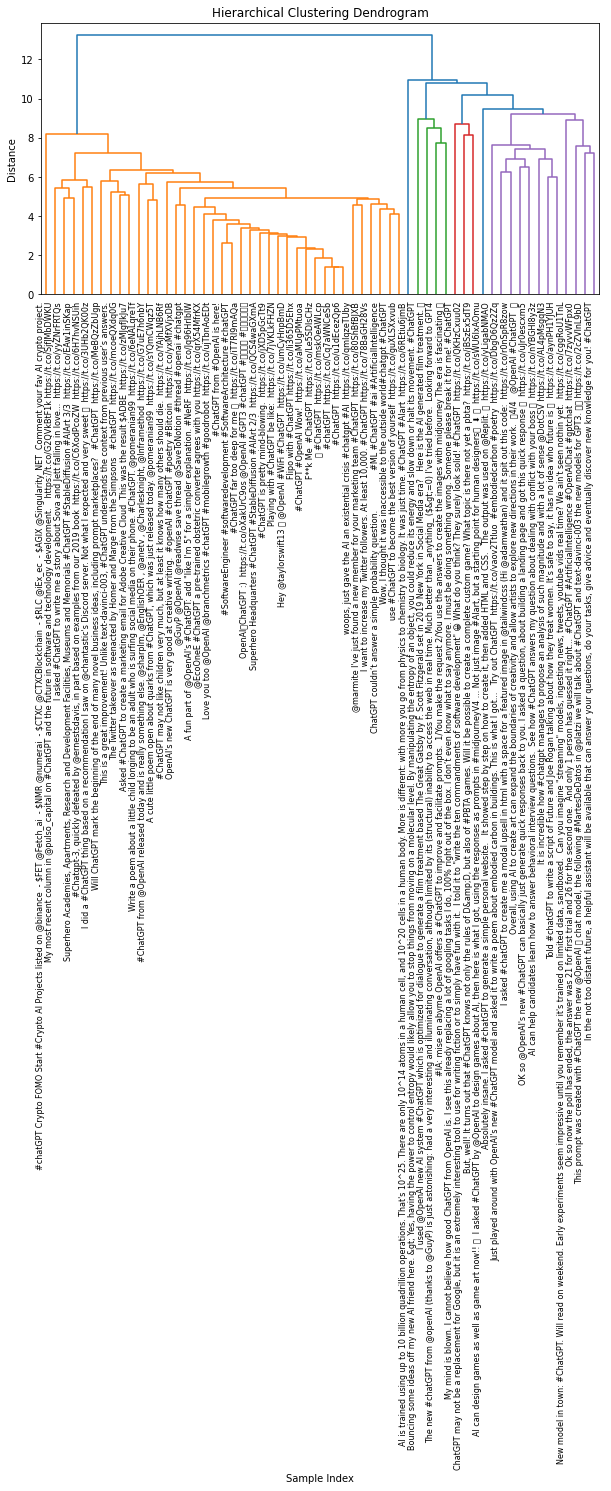

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the text data
with open('dataframe_0_preprocessed.txt', 'r') as f:
    documents = f.readlines()

# Create a bag-of-words matrix
vectorizer = CountVectorizer()
word_matrix = vectorizer.fit_transform(documents).toarray()
print(documents)
# Perform agglomerative clustering
Z = linkage(word_matrix, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8., labels=documents)
plt.show()

<h2>Detemining optimal number of clusters using elbow method</h2>

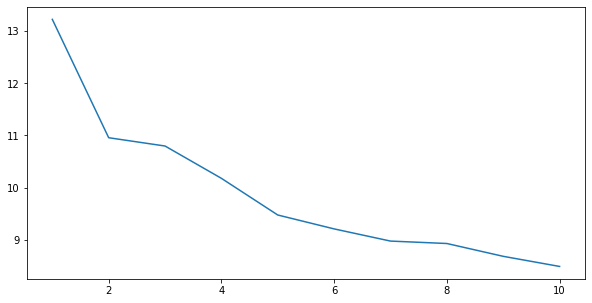

In [61]:
# Determine the optimal number of clusters using the elbow method
last = Z[-10:, 2]
last_rev = last[::-1]
idx = np.arange(1, len(last) + 1)
plt.figure(figsize=(10, 5))
plt.plot(idx, last_rev)

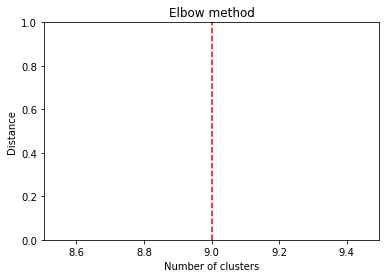

In [71]:
# Calculate the second derivative of the distances
acceleration = np.diff(last, 2)

# Find the index of the elbow point, where the acceleration is highest
elbow_idx = np.argmax(acceleration) + 2

# Plot the elbow point
plt.axvline(x=elbow_idx, color='r', linestyle='--')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Distance')
plt.show()

# Use the optimal number of clusters to perform clustering
n_clusters = elbow_idx
labels = fcluster(Z, n_clusters, criterion='maxclust')

In [66]:
n_clusters

9

ignore the rest 

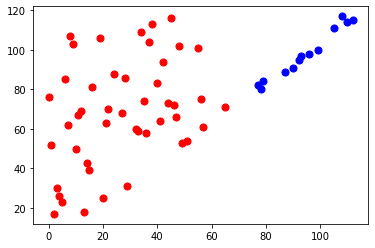

In [49]:
model = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
model.fit(Z)
labels = model.labels_

plt.scatter(Z[labels==0, 0], Z[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(Z[labels==1, 0], Z[labels==1, 1], s=50, marker='o', color='blue')

plt.show()

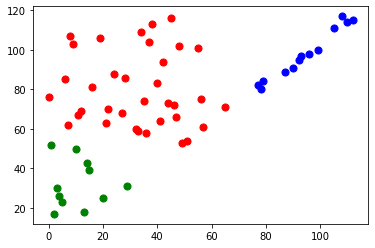

In [51]:
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
model.fit(Z)
labels = model.labels_

plt.scatter(Z[labels==0, 0], Z[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(Z[labels==1, 0], Z[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(Z[labels==2, 0], Z[labels==2, 1], s=50, marker='o', color='green')
plt.show()

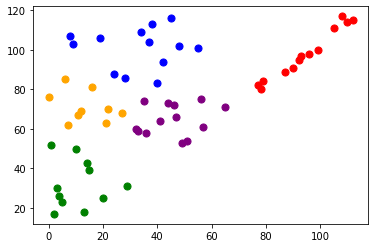

In [52]:
model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
model.fit(Z)
labels = model.labels_

plt.scatter(Z[labels==0, 0], Z[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(Z[labels==1, 0], Z[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(Z[labels==2, 0], Z[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(Z[labels==3, 0], Z[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(Z[labels==4, 0], Z[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

In [54]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import AgglomerativeClustering

# Load the text data
with open('dataframe_0_preprocessed.txt', 'r') as f:
    documents = f.readlines()

# Create a bag-of-words matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents).toarray()

# Perform agglomerative clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_cluster.fit(X)

# Get the cluster labels
labels = agg_cluster.labels_

# Print the results
df = pd.DataFrame({'document': documents, 'label': labels})
print(df)


                                             document  label
0   I want to increase my Twitter followers. At le...      1
1   Overall, using AI to create art can expand the...      0
2   This prompt was created with #ChatGPT the new ...      0
3   Just played around with OpenAI's new #ChatGPT ...      0
4   I asked #ChatGPT to write me a story about Sov...      1
5   OpenAI's new ChatGPT is very good at creative ...      1
6   This is a great improvement! Unlike text-davin...      1
7    #ChatGPT #OpenAI Wow!  https://t.co/aMUgPMtuoa\n      1
8   My mind is blown. I cannot believe how good Ch...      0
9   Absolutely insane. I asked #chatGPT to generat...      0
10  It is incredible how #chatgpt manages to propo...      0
11  #ChatGPT is pretty mind-blowing.  https://t.co...      1
12  OpenAIのChatGPT :)  https://t.co/oXakUrC9os @Op...      1
13  #ChatGPT from @OpenAI released today and is re...      1
14                   #ChatGPT from #OpenAI is here!\n      1
15  The new #chatGPT fro